- 네이버 api 검색을 통한 '콘솔게임' 수요에 대한 당위성 체크

In [1]:
# 네이버 검색 API는 블로그부터 전문자료까지 호출 방법이 동일
import os
import sys
import urllib.request
import requests
import pandas as pd
from urllib.parse import urlparse # 한글처리
import urllib.parse

import pandas as pd
import numpy as np
from konlpy.tag import Okt
from collections import Counter
# 워드 클라우드 라이브러리 호출
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
import platform
import PIL

In [3]:
def get_api_result(sel,key,dis,start_num):
    client_id = 'KcGYrePLwLK2j3DlWS5r'
    client_secret = 'ns9p5kY316'
    keyword = urllib.parse.quote(key)
    num = dis # 요청으로 갖고올 검색결과 수
    start = start_num # 몇번째 검색결과부터 요청할 것인지
    # 요청 URL
    if sel =='뉴스':
        sel_fin='news'
    else:
        sel_fin='blog'
    base_url = 'https://openapi.naver.com/v1/search/' + sel_fin + '.json'
    param ='?query='+keyword + '&display='+ str(num) + '&start=' + str(start)
    url = base_url + param
    # 인증정보는  header에 포함
    headers = {"X-Naver-Client-Id": client_id, 
               "X-Naver-Client-Secret" : client_secret}
    # 요청
    result = requests.get(url,headers=headers)
    # json 변환
    json_obj = result.json()
    return json_obj

In [4]:
def call_and_save(sel,key,dis_num,start_num):
    json_obj = get_api_result(sel,key,dis_num,start_num)
    
    title = [item['title'] for item in json_obj['items']]
    link = [item['link'] for item in json_obj['items']]
    
    return pd.DataFrame(
        {'제목':title,
        'link':link,
        '분류':sel}
    )

In [12]:
df_fin=pd.DataFrame()
for start in range(1,302,100):
    df = call_and_save('뉴스','콘솔게임',100,start)
    df_fin = pd.concat([df_fin,df], axis=0, ignore_index=True)
    
#df_fin.head(20)    

In [52]:
df_fin['제목']

0             일반 매치에서도 사용 가능, 배틀그라운드에 &apos;부활&apos; 생긴다
1                            넥슨, 1분기 영업익 5406억원…전년比 46%↑
2                           넥슨 1분기 영업익 5406억...역대 최고치 기록
3                 넥슨, 1분기에 1조원 매출 돌파...신작에 2분기도 매출 성장 예상
4                  넥슨, 2023년 1분기 매출 1조 돌파…단일 분기 역대 최대 매출
                             ...                        
395    배틀 뷰, 컷신 개선에 <b>콘솔</b> 버전까지 준비한 &apos;브라운더스트2&...
396     2분기 흑자 자신감 장현국 위메이드 대표 &quot;수십만 주주에 보답할 것&quot;
397    네오위즈 신작 &apos;브라운더스트2&apos;, 피드백 반영으로 완성도UP! 6...
398      &apos;선물과 같은 <b>게임</b>&apos;, 브라운더스트 2 론칭 계획 발표
399                       엔씨 1분기 실적발표 “국내 MMO 경쟁 심화 반갑다”
Name: 제목, Length: 400, dtype: object

In [18]:
# 검색어를 활용한 워드크라우드 만드는 함수
def making_wordcloud(search_words):
    df_fin=pd.DataFrame()
    for search_word in search_words:
        for start in range(1,302,100):
            df = call_and_save('뉴스',search_word,100,start)
            df_fin = pd.concat([df_fin,df], axis=0, ignore_index=True)

    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(df_fin['제목'].to_string())
    count = Counter(nouns)
    
    # 한 글자 키워드를 제거합니다.
    count = Counter({x : count[x] for x in count if len(x) > 1})
    
    # 워드 클라우드에 필요한 글꼴 지정
    if platform.system() == 'Windows':   #윈도우의    경우 
        font_path = "c:/Windows/Fonts/malgun.ttf"
    elif platform.system() == "Darwin":   #Mac 의 경우
        font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"
    
    # 워드 크라우드 mask 이미지 설정
    icon = PIL.Image.open('./data/cloud.png').convert("RGBA")

    img = PIL.Image.new('RGB', icon.size, (255,255,255))
    img.paste(icon, icon)
    img = np.array(img)
    
    #워드 클라우드 만들기
    wordcloud=WordCloud(font_path= font_path, background_color="white",  
                    max_words=100, relative_scaling= 0.3, 
                    width = 800, height = 400
                   ).generate_from_frequencies(count)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis('off')
    
    # 워드크라우드 그림파일 저장
    plt.savefig('./data/tag-wordcloud.png') 

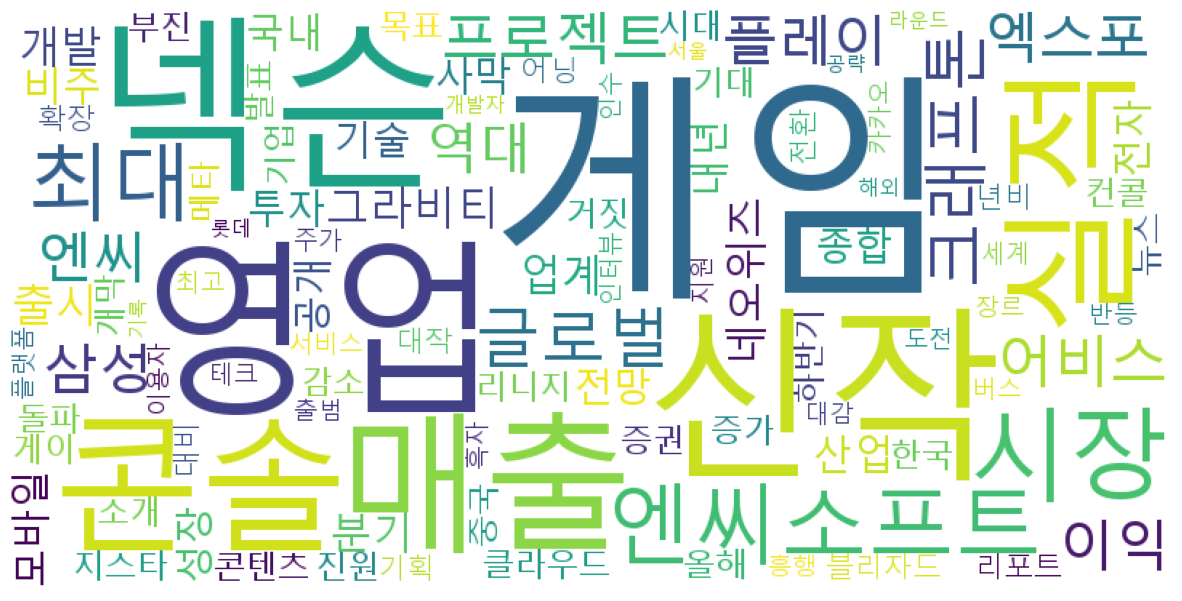

In [19]:
search_words = ['콘솔시장 전망','콘솔게임','콘솔게임 수요','콘솔게임 현황']
making_wordcloud(search_words)

## 형태소 분석

In [8]:
import sys

print(sys.version)

3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]


In [54]:
# !pip install konlpy

In [11]:
df_fin['제목'].to_string()

'0                    그라비티, 플레이엑스포서 시연작 14종으로 관람객에 즐거움 선사\n1                닌텐도 CEO &quot;내년 봄까지 스위치2 출시 없을 것&quot;\n2                           부모∙자녀∙반려동물…모두가 행복한 5월의 ‘팸캉스’\n3               그라비티, &apos;2023 플레이엑스포&apos;서 14종 장르 시연\n4             공정위, &apos;MS-블리자드&apos; 기업결합 이르면 이달 승인 전망\n5                  그라비티, 2023 플레이엑스포에서 시연작 14종 다양한 재미 제공\n6           핵심 IP로 갈린 1분기 실적, 2분기 &apos;킬러 IP&apos;에 달렸다\n7        그라비티, 2023 플레이엑스포에서 시연작 14종으로 다채로운 경험 및 즐거움 ...\n8        그라비티, 2023 플레이엑스포에서 시연작 14종으로 다양한 경험 및 즐거움 선...\n9                                MS의 블리자드 인수, 불발 가능성 커졌다\n10                         그라비티, 2023 플레이엑스포서 시연작 14종 선봬\n11        그라비티 &apos;2023 플레이엑스포&apos; 참가 종료..14종 시연작 공개\n12                      MS의 액티비전 블리자드 인수, 한국과 EU는 승인에 무게\n13       그라비티, 2023 플레이엑스포에서 시연작 14종으로 다채로운 경험 및 즐거움 ...\n14                       그라비티, 2023 플레이엑스포에서 시연작 14종 뽐냈다\n15     [금주의 <b>게임</b>일정]넥슨 &apos;베일드 엑스퍼트&apos; 글로벌 얼...\n16                                   <b>게임</b>, 현대미술이 되다\n17           

In [10]:
from konlpy.tag import Okt
from collections import Counter

nouns_tagger = Okt()
nouns = nouns_tagger.nouns(df_fin['제목'].to_string())
count = Counter(nouns)
count

count = Counter({x : count[x] for x in count if len(x) > 1})
count

Counter({'그라비티': 61,
         '플레이': 67,
         '엑스포': 67,
         '연작': 8,
         '관람객': 1,
         '즐거움': 4,
         '선사': 1,
         '닌텐도': 4,
         '내년': 1,
         '스위치': 3,
         '출시': 23,
         '부모': 1,
         '자녀': 1,
         '반려동물': 1,
         '모두': 8,
         '팸캉스': 3,
         '장르': 2,
         '시연': 3,
         '공정위': 6,
         '블리자드': 13,
         '기업': 2,
         '결합': 1,
         '승인': 8,
         '전망': 2,
         '재미': 1,
         '제공': 1,
         '핵심': 1,
         '실적': 51,
         '킬러': 1,
         '경험': 3,
         '인수': 9,
         '불발': 1,
         '가능성': 1,
         '선봬': 1,
         '참가': 6,
         '종료': 1,
         '공개': 14,
         '액티비전': 1,
         '한국': 3,
         '무게': 1,
         '금주': 1,
         '게임': 109,
         '일정': 1,
         '넥슨': 99,
         '일드': 2,
         '엑스': 3,
         '퍼트': 2,
         '글로벌': 7,
         '미술': 2,
         '가정': 2,
         '호텔': 4,
         '스컴': 2,
         '바인': 2,
         '추천': 2,


In [36]:
# ! pip install pytagcloud pygame simplejson

In [72]:
import random 
import pytagcloud
import webbrowser

# 가장 출현 빈도수가 높은 20개 단어 선정
ranked_tags = count.most_common(20)
ranked_tags
# pytagcloud로 출력할 20개의 단어를 입력한다. 단어 출력의 최대 크기는 80으로 제한
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

# pytagcloud 이미지를 생성한다. 폰트는 나눔 고딕을 사용
#pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900,600),
#                           fontname='NanumGothic', rectangular=False)

# 생성한 이미지를 주피너 노트북상에서 출력
#Image(filename='wordcloud.jpg')

In [62]:
#시각화 라이브러리 import 및 글꼴 설정
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import font_manager, rc 
import sys

if sys.platform in ["win32", "win64"]: 
    font_name = "malgun gothic"
elif sys.platform == "darwin": 
    font_name = "AppleGothic"

rc('font',family=font_name)

In [63]:
# 워드 클라우드 라이브러리 호출
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
import platform

# 워드 클라우드에 필요한 글꼴 지정
if platform.system() == 'Windows':   #윈도우의    경우 
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

(-0.5, 799.5, 399.5, -0.5)

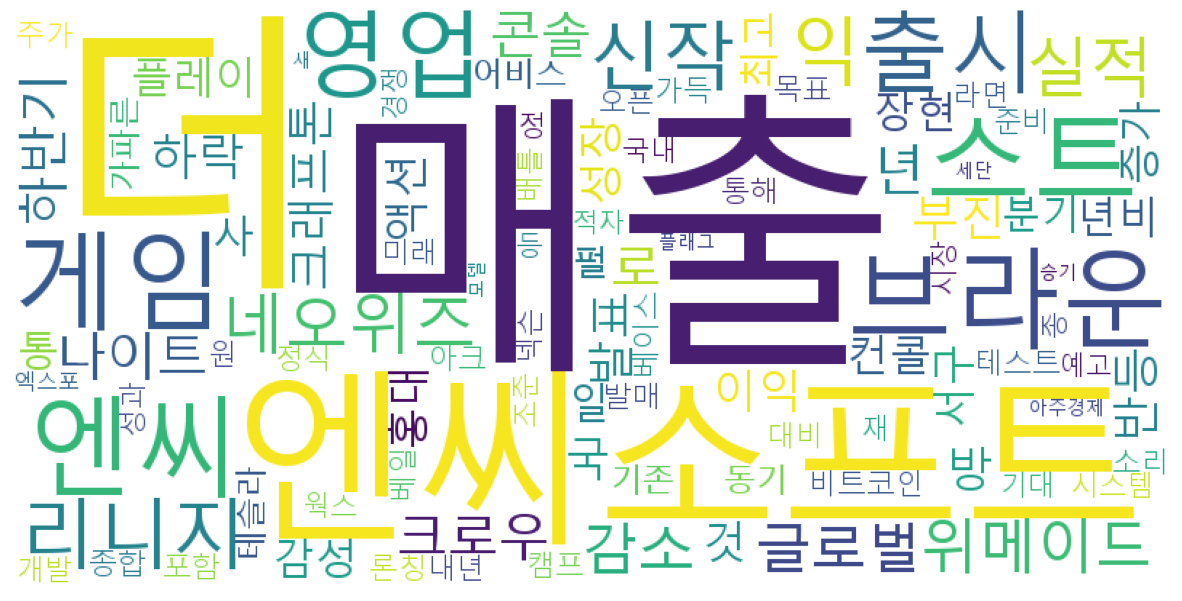

In [65]:
#워드 클라우드 만들기
wordcloud=WordCloud(font_path= font_path,
                    background_color="white",  
                    max_words=100, 
                    relative_scaling= 0.3, 
                    width = 800,
                    height = 400
                   ).generate_from_frequencies(count)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')